In [1]:
import PyLRO as pyl

In [2]:
mg = pyl.pylro(filename='CONTCAR', atom_number=12)
mg.lattice_fit()
#mg.miller_sphere_plot()

In [3]:
mg.dimensions

[2, 4, 4]

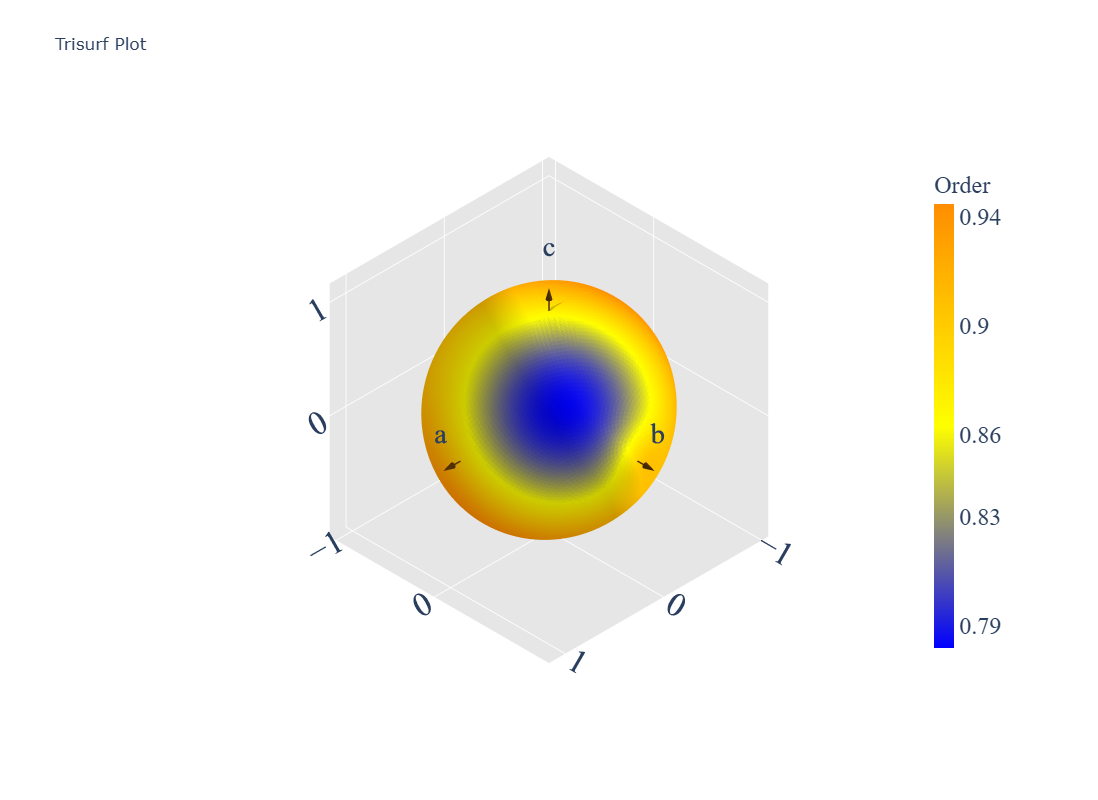

In [4]:
mg.miller_sphere_plot()

In [5]:
# Assuming 'li' is an instance of your class that contains the 'maximum_order' method
max_order, max_hkl = mg.maximum_order()

# Output the results
print(f"Maximum Order: {max_order}")
print(f"Corresponding Miller Index (hkl): {max_hkl}")

Maximum Order: 0.05511479626036076
Corresponding Miller Index (hkl): [-0.83711874  0.1130186   0.53521865]


In [6]:
# Assuming 'li' is an instance of your class that contains the 'minimum_order' method
min_order, min_hkl = mg.minimum_order()

# Output the results
print(f"Minimum Order: {min_order}")
print(f"Corresponding Miller Index (hkl): {min_hkl}")


Minimum Order: 0.2183776917044287
Corresponding Miller Index (hkl): [-0.52139959 -0.64520744 -0.55843516]


In [7]:
plane = [1, 0, 0]  # Example plane direction
result = mg.plane_order(plane, angstrom=True)
print("Average disorder in angstroms:", result)

result_relative = mg.plane_order(plane, angstrom=False)
print("Average disorder in relative units:", result_relative)

Average disorder in angstroms: 0.9483494444106536
Average disorder in relative units: 0.10764673602222219


In [8]:
plane = [0, 1, 0]  # Example plane direction
result = mg.plane_order(plane, angstrom=True)
print("Average disorder in angstroms:", result)

result_relative = mg.plane_order(plane, angstrom=False)
print("Average disorder in relative units:", result_relative)

Average disorder in angstroms: 1.5340861807219646
Average disorder in relative units: 0.14248613004444452


In [9]:
plane = [0, 0, 1]  # Example plane direction
result = mg.plane_order(plane, angstrom=True)
print("Average disorder in angstroms:", result)

result_relative = mg.plane_order(plane, angstrom=False)
print("Average disorder in relative units:", result_relative)

Average disorder in angstroms: 1.4608773893183604
Average disorder in relative units: 0.12591903522222225


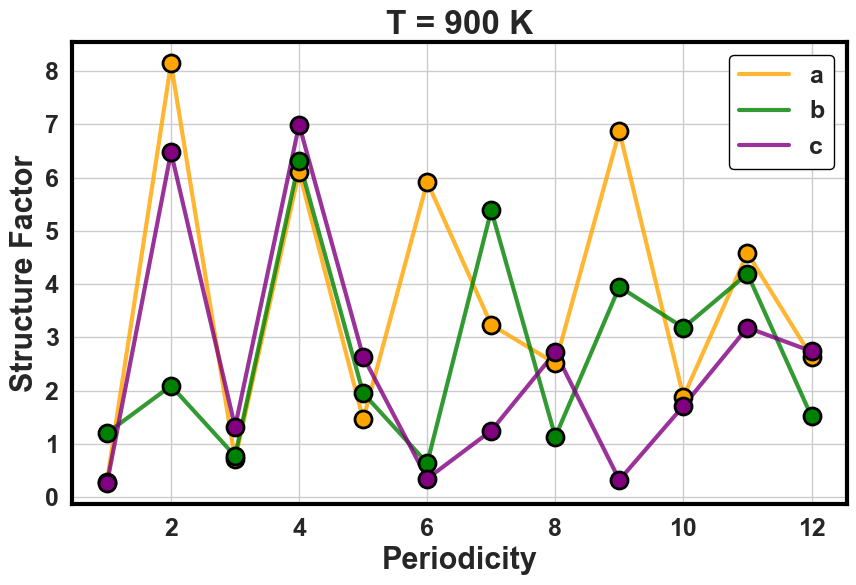

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def structure_factor(pos, hkl):
    """ N*1 array"""
    F = 0
    h, k, l = hkl
    for xyz in pos:
        x, y, z = xyz
        F += np.exp(-2 * np.pi * (1j) * (h * x + k * y + l * z))
    return F

# Set the style for the plot
sns.set(style="whitegrid")
plt.rcParams["axes.titlesize"] = 24  # Increase title font size
plt.rcParams["axes.labelsize"] = 22  # Increase axis label font size
plt.rcParams["xtick.labelsize"] = 18  # Increase x-tick label font size
plt.rcParams["ytick.labelsize"] = 18  # Increase y-tick label font size
plt.rcParams["legend.fontsize"] = 18  # Increase legend font size
plt.rcParams["legend.title_fontsize"] = 20  # Increase legend title font size
plt.rcParams["font.weight"] = 'bold'  # Set font weight to bold

pmax = 13
stest = range(1, 13)
a = []
b = []
c = []
basis = np.array([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])
abc = []

# Compute structure factor for different Miller indices
for b in basis:
    s = []
    for i in stest:
        factor = np.abs(structure_factor(mg.atom_locations, b * i))
        # Only append positive structure factors
        if factor > 0:
            s.append(factor)
        else:
            s.append(np.nan)  # Use NaN to omit negative or zero values from plotting
    abc.append(s)

# Create a plot
fig = plt.figure(figsize=(10, 6))  # Adjust the size to your preference

# Plot each direction (a, b, c) with new colors
plt.plot(stest, abc[0], label='a', color='orange', alpha=0.8, linewidth=3)
plt.plot(stest, abc[1], label='b', color='green', alpha=0.8, linewidth=3)
plt.plot(stest, abc[2], label='c', color='purple', alpha=0.8, linewidth=3)

# Scatter plot with deep color and bigger markers
plt.scatter(stest, abc[0], color='orange', s=150, zorder=5, edgecolor='black', linewidth=2)
plt.scatter(stest, abc[1], color='green', s=150, zorder=5, edgecolor='black', linewidth=2)
plt.scatter(stest, abc[2], color='purple', s=150, zorder=5, edgecolor='black', linewidth=2)

# Add a black border around the plot (outside the graph area)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')  # Set the border color to black
    spine.set_linewidth(3)        # Set the border width

# Improve legend with bold square box, and deep color
plt.legend(frameon=True, loc='upper right', fontsize=18, framealpha=1, facecolor='white', edgecolor='black', markerfirst=True)

# Customize labels and title
plt.ylabel('Structure Factor', fontsize=22, fontweight='bold')
plt.xlabel('Periodicity', fontsize=22, fontweight='bold')
plt.title('T = 900 K', fontsize=24, fontweight='bold')  # Add title

# Save the plot as a .tif file
plt.savefig('structure_factor_plot_with_border_900.tif', dpi=300, bbox_inches='tight')

# Show the plot (this line ensures the plot is displayed)
plt.show()
